In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df = pd.read_excel('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/13 Decision Tree/heart_disease.xlsx',sheet_name='Heart_disease')

In [336]:
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

### EDA


In [337]:
df.shape

(908, 13)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [339]:
for i in df.columns:
    print(i, df[i].isnull().sum())

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalch 0
exang 0
oldpeak 62
slope 0
thal 0
num 0


In [340]:
df[df.duplicated()]

age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

    exang  oldpeak        slope    thal  num  
765  True      0.0  downsloping  normal    2

In [341]:
df.drop_duplicates(inplace=True)

In [342]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [343]:
nuemeric_col=df[['age','trestbps','chol','thalch','oldpeak','num']]

Statistics for 'age':
count    907.000000
mean      53.787211
std        9.162016
min       29.000000
25%       47.500000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


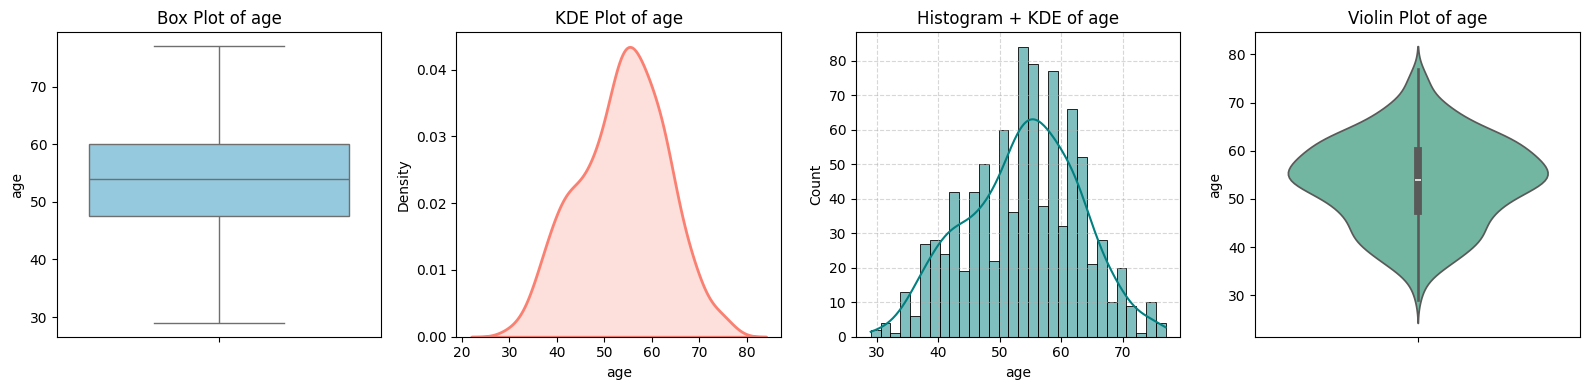

Statistics for 'trestbps':
count    907.000000
mean     133.412348
std       20.405432
min        0.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      200.000000
Name: trestbps, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


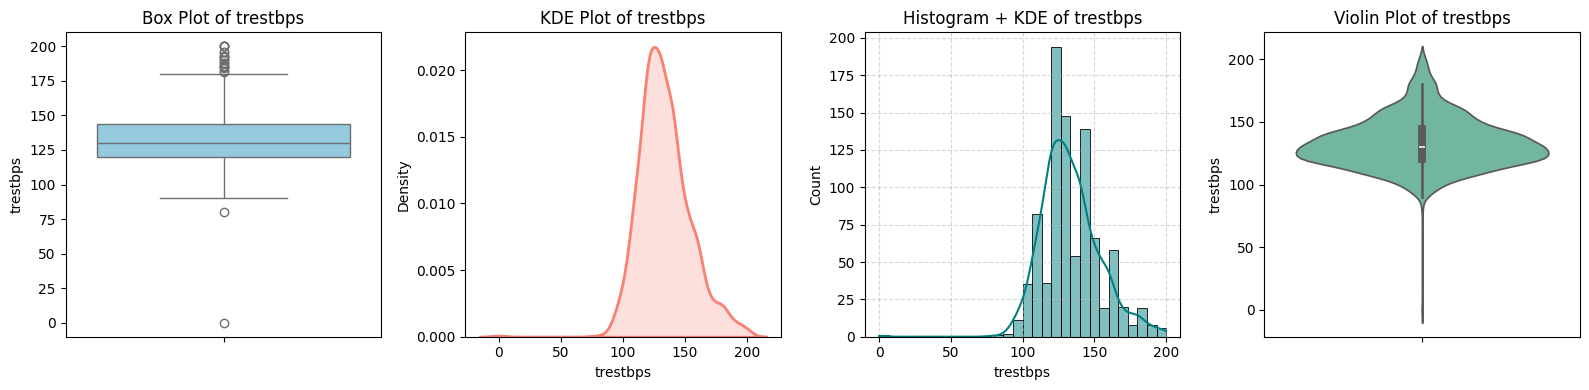

Statistics for 'chol':
count    907.000000
mean     201.465270
std      112.158285
min        0.000000
25%      176.500000
50%      224.000000
75%      270.000000
max      603.000000
Name: chol, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


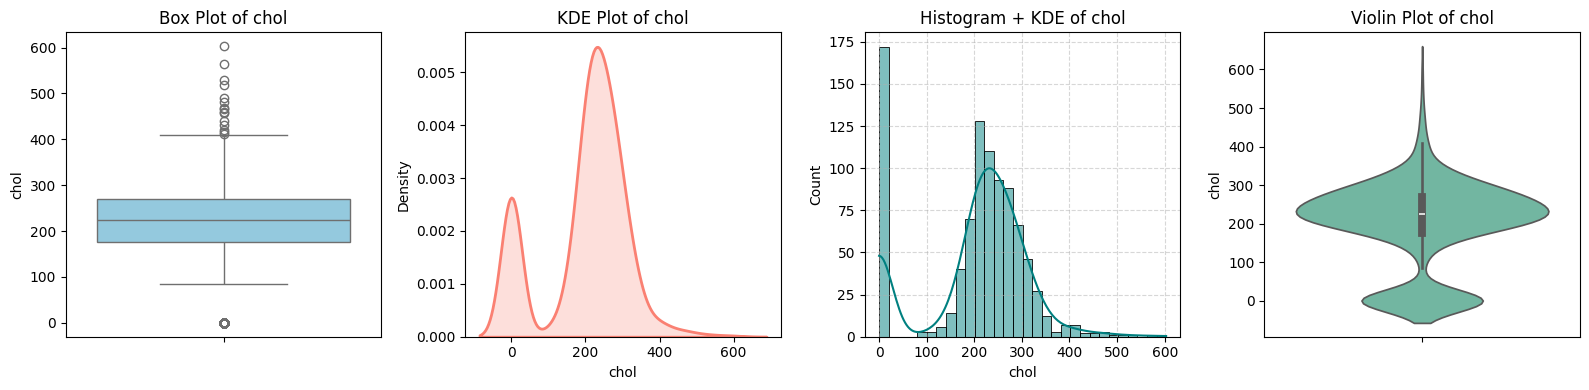

Statistics for 'thalch':
count    907.000000
mean     135.976847
std       26.813075
min       60.000000
25%      118.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


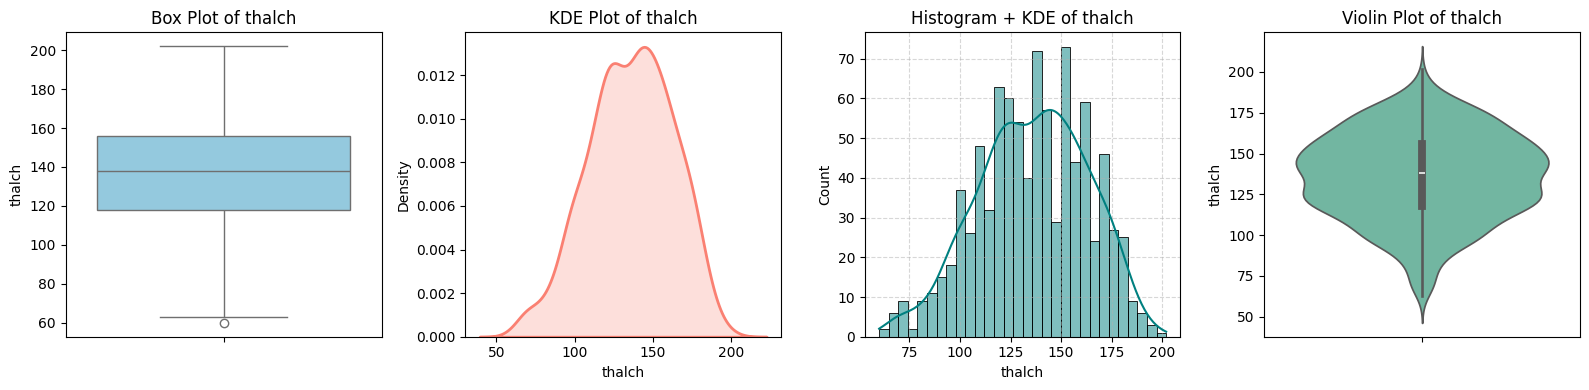

Statistics for 'oldpeak':
count    845.000000
mean       0.892308
std        1.094092
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


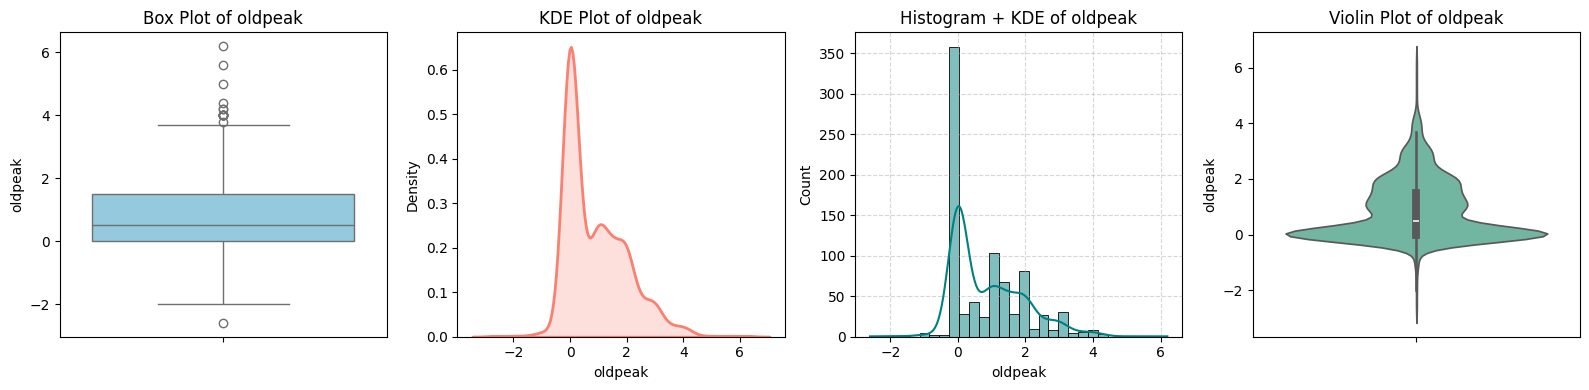

Statistics for 'num':
count    907.000000
mean       1.007718
std        1.144594
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_16872\604550504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


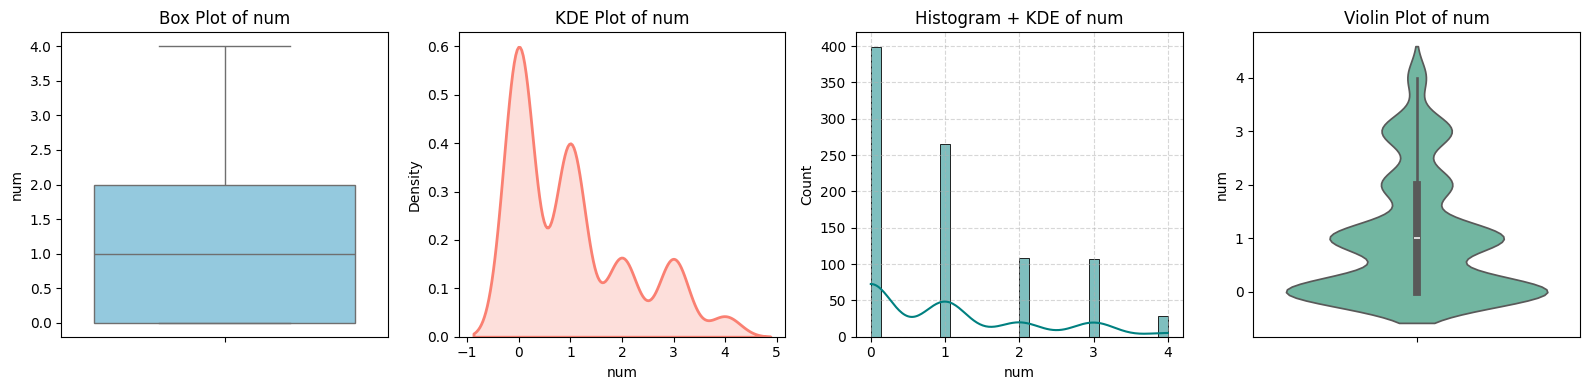

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the DataFrame
for col in nuemeric_col.columns:
    # Print descriptive statistics
    print(f"Statistics for '{col}':")
    print(df[col].describe(), "\n")
    
    # Set up the figure with subplots for boxplot, KDE, histogram + KDE, and violin plot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Reduced figure size (1 row, 4 columns)

    # Box plot (1st plot)
    sns.boxplot(y=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Box Plot of {col}')
    axes[0].set_ylabel(col)

    # KDE plot (2nd plot)
    sns.kdeplot(df[col], fill=True, ax=axes[1], color='salmon', linewidth=2)
    axes[1].set_title(f'KDE Plot of {col}')
    axes[1].set_xlabel(col)

    # Histogram with KDE (3rd plot)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[2], color='teal')
    axes[2].set_title(f'Histogram + KDE of {col}')
    axes[2].set_xlabel(col)
    axes[2].grid(True, linestyle='--', alpha=0.5)

    # Violin plot (4th plot)
    sns.violinplot(y=df[col], ax=axes[3], palette='Set2')
    axes[3].set_title(f'Violin Plot of {col}')
    axes[3].set_ylabel(col)

    # Adjust layout to make sure plots don't overlap
    plt.tight_layout()
    plt.show()

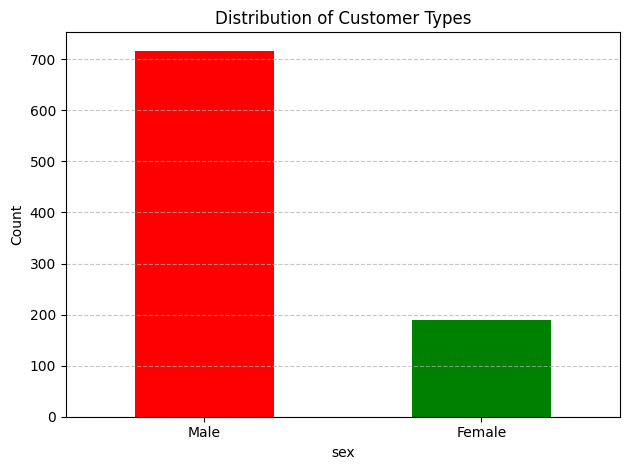

In [345]:
df['sex'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'orange', 'purple', 'cyan'])

plt.title('Distribution of Customer Types')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

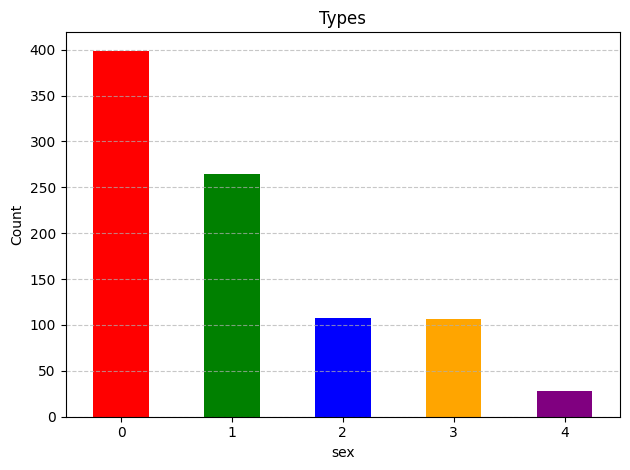

In [346]:
df['num'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'orange', 'purple', 'cyan'])

plt.title('Types')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

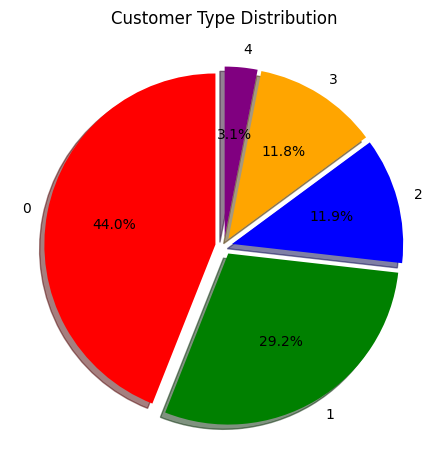

In [347]:
# Pie chart for 'Type'
df['num'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['num'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [348]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [349]:
bool_cols = ['sex_Male']

In [350]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [351]:
for col in bool_cols:
    df[col] = df[col].astype(bool).astype(int)

In [352]:
df

age               cp  trestbps  chol    fbs           restecg  thalch  \
0     63   typical angina       145   233   True    lv hypertrophy     150   
1     41  atypical angina       135   203  False            normal     132   
2     57     asymptomatic       140   192  False            normal     148   
3     52   typical angina       118   186  False    lv hypertrophy     190   
4     57     asymptomatic       110   201  False            normal     126   
..   ...              ...       ...   ...    ...               ...     ...   
903   53     asymptomatic       125     0  False            normal     120   
904   62     asymptomatic       166   170  False  st-t abnormality     120   
905   56      non-anginal       170     0  False    lv hypertrophy     123   
906   56      non-anginal       144   208   True  st-t abnormality     105   
907   57     asymptomatic       142   277   True  st-t abnormality     182   

     exang  oldpeak        slope               thal  num  sex_Male  
0    False      2.3  downsloping       fixed defect    0         1  
1    False      0.0         flat       fixed defect    0         1  
2    False      0.4         flat       fixed defect    0         1  
3    False      0.0         flat       fixed defect    0         1  
4     True      1.5         flat       fixed defect    0         1  
..     ...      ...          ...                ...  ...       ...  
903  False      1.5    upsloping  reversable defect    4         1  
904   True      3.0         flat  reversable defect    4         1  
905   True      2.5  downsloping             normal    4         1  
906   TURE      NaN  downsloping       fixed defect    4         1  
907  FALSE      NaN         flat  reversable defect    4         1  

[907 rows x 13 columns]

In [353]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: count, dtype: int64

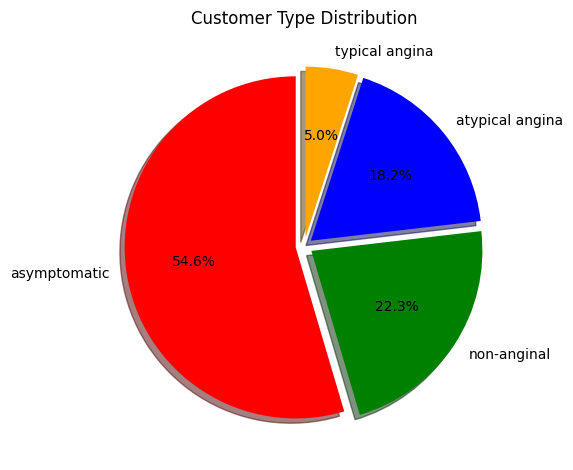

In [354]:
# Pie chart for 'Type'
df['cp'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['cp'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [355]:
df.groupby('cp')['num'].value_counts().reset_index().sort_values(by='num')

cp  num  count
1      asymptomatic    0    103
5   atypical angina    0    141
14   typical angina    0     25
9       non-anginal    0    130
10      non-anginal    1     37
15   typical angina    1     12
6   atypical angina    1     19
0      asymptomatic    1    197
12      non-anginal    2     13
8   atypical angina    2      2
2      asymptomatic    2     89
16   typical angina    2      4
11      non-anginal    3     18
7   atypical angina    3      3
17   typical angina    3      3
3      asymptomatic    3     83
13      non-anginal    4      4
4      asymptomatic    4     23
18   typical angina    4      1

In [356]:
df = pd.get_dummies(df, columns=['cp'], drop_first=True)

In [357]:
for col in df[['cp_atypical angina','cp_non-anginal','cp_typical angina']]:
    df[col] = df[col].astype(bool).astype(int)

In [358]:
df.head()

age  trestbps  chol    fbs         restecg  thalch  exang  oldpeak  \
0   63       145   233   True  lv hypertrophy     150  False      2.3   
1   41       135   203  False          normal     132  False      0.0   
2   57       140   192  False          normal     148  False      0.4   
3   52       118   186  False  lv hypertrophy     190  False      0.0   
4   57       110   201  False          normal     126   True      1.5   

         slope          thal  num  sex_Male  cp_atypical angina  \
0  downsloping  fixed defect    0         1                   0   
1         flat  fixed defect    0         1                   1   
2         flat  fixed defect    0         1                   0   
3         flat  fixed defect    0         1                   0   
4         flat  fixed defect    0         1                   0   

   cp_non-anginal  cp_typical angina  
0               0                  1  
1               0                  0  
2               0                  0  
3               0                  1  
4               0                  0

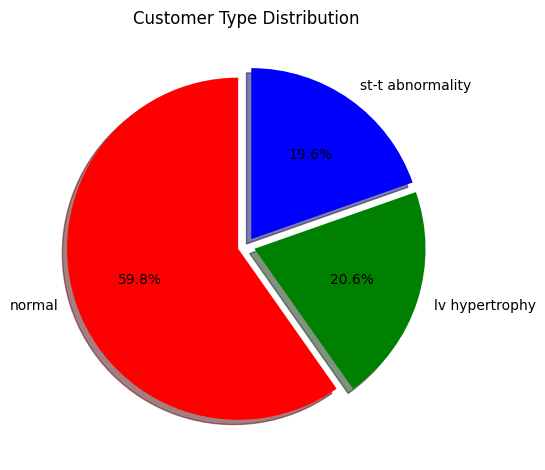

In [359]:
# Pie chart for 'Type'
df['restecg'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['restecg'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [360]:
df = pd.get_dummies(df, columns=['restecg'], drop_first=True)

In [361]:
for col in df[['restecg_normal','restecg_st-t abnormality']]:
    df[col] = df[col].astype(bool).astype(int)

In [362]:
df.head(1)

age  trestbps  chol   fbs  thalch  exang  oldpeak        slope  \
0   63       145   233  True     150  False      2.3  downsloping   

           thal  num  sex_Male  cp_atypical angina  cp_non-anginal  \
0  fixed defect    0         1                   0               0   

   cp_typical angina  restecg_normal  restecg_st-t abnormality  
0                  1               0                         0

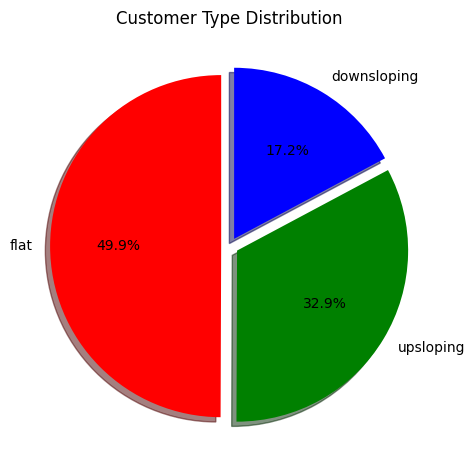

In [363]:
# Pie chart for 'Type'
df['slope'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['slope'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [364]:
df = pd.get_dummies(df, columns=['slope'], drop_first=True)

In [365]:
for col in df[['slope_flat','slope_upsloping']]:
    df[col] = df[col].astype(bool).astype(int)

In [366]:
df.head()

age  trestbps  chol    fbs  thalch  exang  oldpeak          thal  num  \
0   63       145   233   True     150  False      2.3  fixed defect    0   
1   41       135   203  False     132  False      0.0  fixed defect    0   
2   57       140   192  False     148  False      0.4  fixed defect    0   
3   52       118   186  False     190  False      0.0  fixed defect    0   
4   57       110   201  False     126   True      1.5  fixed defect    0   

   sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0         1                   0               0                  1   
1         1                   1               0                  0   
2         1                   0               0                  0   
3         1                   0               0                  1   
4         1                   0               0                  0   

   restecg_normal  restecg_st-t abnormality  slope_flat  slope_upsloping  
0               0                         0           0                0  
1               1                         0           1                0  
2               1                         0           1                0  
3               0                         0           1                0  
4               1                         0           1                0

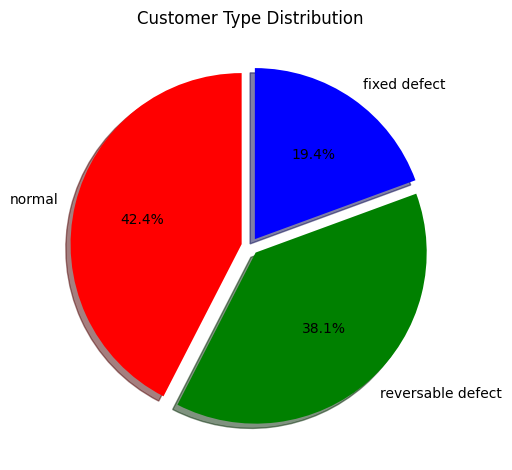

In [367]:
# Pie chart for 'Type'
df['thal'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['thal'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [368]:
df = pd.get_dummies(df, columns=['thal'], drop_first=True)

In [369]:
df.head()

age  trestbps  chol    fbs  thalch  exang  oldpeak  num  sex_Male  \
0   63       145   233   True     150  False      2.3    0         1   
1   41       135   203  False     132  False      0.0    0         1   
2   57       140   192  False     148  False      0.4    0         1   
3   52       118   186  False     190  False      0.0    0         1   
4   57       110   201  False     126   True      1.5    0         1   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  1               0   
1                   1               0                  0               1   
2                   0               0                  0               1   
3                   0               0                  1               0   
4                   0               0                  0               1   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                         0           0                0        False   
1                         0           1                0        False   
2                         0           1                0        False   
3                         0           1                0        False   
4                         0           1                0        False   

   thal_reversable defect  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

In [370]:
for col in df[['thal_normal','thal_reversable defect']]:
    df[col] = df[col].astype(bool).astype(int)

In [371]:
df

age  trestbps  chol    fbs  thalch  exang  oldpeak  num  sex_Male  \
0     63       145   233   True     150  False      2.3    0         1   
1     41       135   203  False     132  False      0.0    0         1   
2     57       140   192  False     148  False      0.4    0         1   
3     52       118   186  False     190  False      0.0    0         1   
4     57       110   201  False     126   True      1.5    0         1   
..   ...       ...   ...    ...     ...    ...      ...  ...       ...   
903   53       125     0  False     120  False      1.5    4         1   
904   62       166   170  False     120   True      3.0    4         1   
905   56       170     0  False     123   True      2.5    4         1   
906   56       144   208   True     105   TURE      NaN    4         1   
907   57       142   277   True     182  FALSE      NaN    4         1   

     cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                     0               0                  1               0   
1                     1               0                  0               1   
2                     0               0                  0               1   
3                     0               0                  1               0   
4                     0               0                  0               1   
..                  ...             ...                ...             ...   
903                   0               0                  0               1   
904                   0               0                  0               0   
905                   0               1                  0               0   
906                   0               1                  0               0   
907                   0               0                  0               0   

     restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                           0           0                0            0   
1                           0           1                0            0   
2                           0           1                0            0   
3                           0           1                0            0   
4                           0           1                0            0   
..                        ...         ...              ...          ...   
903                         0           0                1            0   
904                         1           1                0            0   
905                         0           0                0            1   
906                         1           0                0            0   
907                         1           1                0            0   

     thal_reversable defect  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
903                       1  
904                       1  
905                       0  
906                       0  
907                       1  

[907 rows x 18 columns]

In [372]:
for col in df[['fbs','exang']]:
    df[col] = df[col].astype(bool).astype(int)

In [373]:
df.head()

age  trestbps  chol  fbs  thalch  exang  oldpeak  num  sex_Male  \
0   63       145   233    1     150      0      2.3    0         1   
1   41       135   203    0     132      0      0.0    0         1   
2   57       140   192    0     148      0      0.4    0         1   
3   52       118   186    0     190      0      0.0    0         1   
4   57       110   201    0     126      1      1.5    0         1   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  1               0   
1                   1               0                  0               1   
2                   0               0                  0               1   
3                   0               0                  1               0   
4                   0               0                  0               1   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                         0           0                0            0   
1                         0           1                0            0   
2                         0           1                0            0   
3                         0           1                0            0   
4                         0           1                0            0   

   thal_reversable defect  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

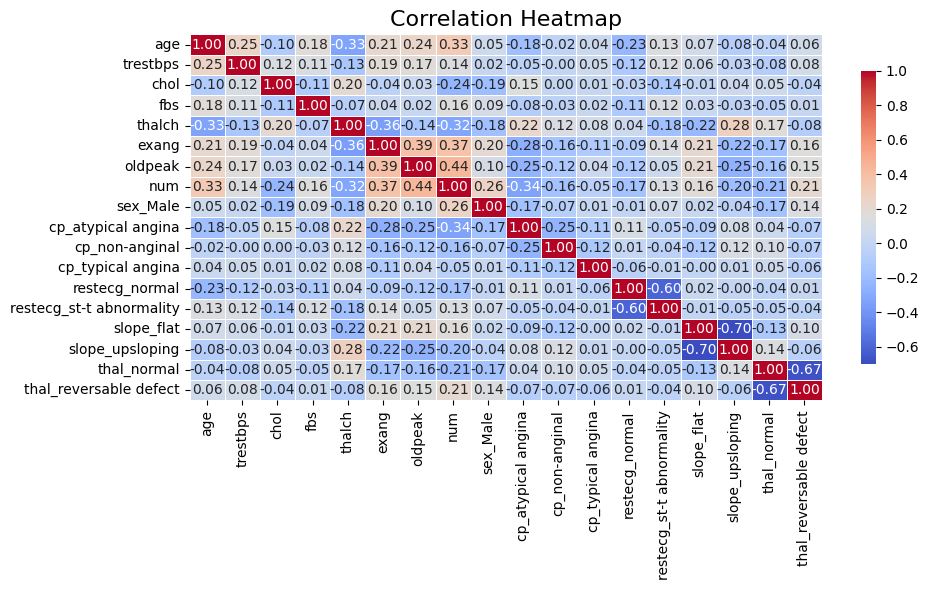

In [374]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()

In [375]:
corr_matrix['num']

age                         0.326227
trestbps                    0.136581
chol                       -0.239065
fbs                         0.156839
thalch                     -0.322632
exang                       0.371679
oldpeak                     0.438834
num                         1.000000
sex_Male                    0.259258
cp_atypical angina         -0.335455
cp_non-anginal             -0.163444
cp_typical angina          -0.054802
restecg_normal             -0.165450
restecg_st-t abnormality    0.130134
slope_flat                  0.164815
slope_upsloping            -0.195553
thal_normal                -0.212488
thal_reversable defect      0.205019
Name: num, dtype: float64

### Model Bilding

In [376]:
df.head()

age  trestbps  chol  fbs  thalch  exang  oldpeak  num  sex_Male  \
0   63       145   233    1     150      0      2.3    0         1   
1   41       135   203    0     132      0      0.0    0         1   
2   57       140   192    0     148      0      0.4    0         1   
3   52       118   186    0     190      0      0.0    0         1   
4   57       110   201    0     126      1      1.5    0         1   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  1               0   
1                   1               0                  0               1   
2                   0               0                  0               1   
3                   0               0                  1               0   
4                   0               0                  0               1   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                         0           0                0            0   
1                         0           1                0            0   
2                         0           1                0            0   
3                         0           1                0            0   
4                         0           1                0            0   

   thal_reversable defect  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [377]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split

In [378]:
x=df.drop('num',axis=1)
y=df['num']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [380]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

###  Base Line Model

In [381]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [382]:
prediction=model.predict(X_test)
print(accuracy_score(y_test,prediction))

0.47985347985347987


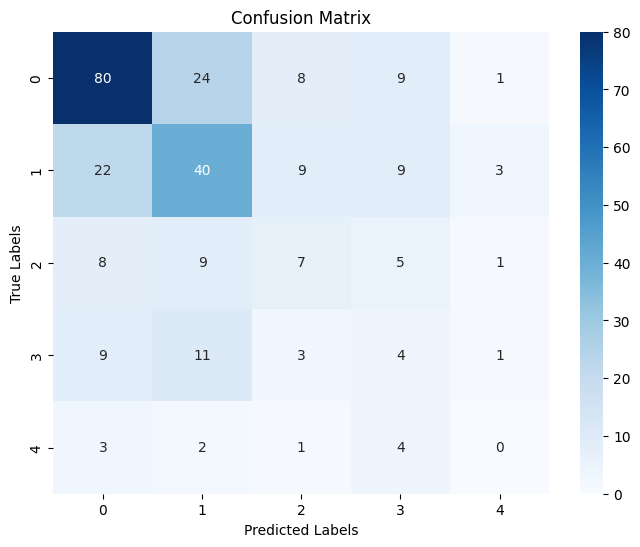

[[80 24  8  9  1]
 [22 40  9  9  3]
 [ 8  9  7  5  1]
 [ 9 11  3  4  1]
 [ 3  2  1  4  0]]


In [383]:
cm = confusion_matrix(y_test, prediction)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(cm)

### Hyper Parameter Tuining

In [384]:
from sklearn.model_selection import GridSearchCV,KFold


In [385]:
model=DecisionTreeClassifier()

In [386]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10, 20, 30, 50, 70, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': [None, 'sqrt', 'log2']
}


In [387]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',  # use 'r2' only for regression models
                           refit=True,
                           cv=kfold,
                           verbose=2)

In [388]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4050 candidates, totalling 20250 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; tota

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10, 20, 30, 50, 70, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [389]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [390]:
grid_search.best_score_

np.float64(0.5710036245469317)

In [391]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [392]:
Final_Model=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=None,min_samples_leaf=10,min_samples_split=2,splitter='best')

In [393]:
Final_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [394]:
prediction=Final_Model.predict(X_test)
print(accuracy_score(y_test,prediction))

0.5677655677655677


In [395]:
confusion_matrix(y_test, prediction)

array([[99, 22,  0,  1,  0],
       [27, 53,  0,  3,  0],
       [ 5, 22,  0,  3,  0],
       [ 6, 19,  0,  3,  0],
       [ 4,  6,  0,  0,  0]])

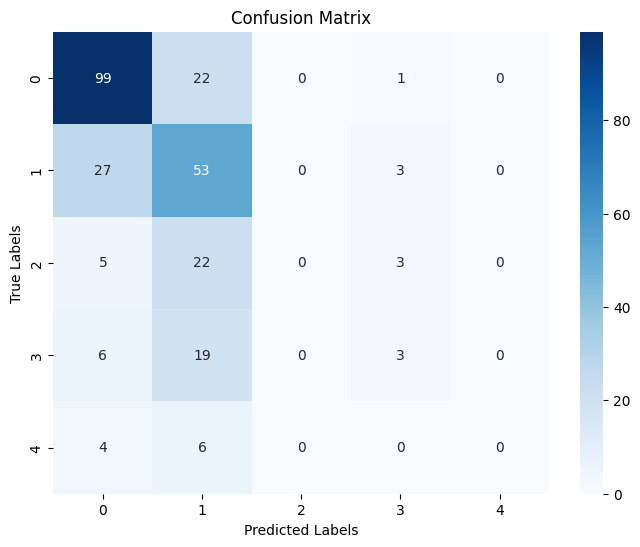

[[99 22  0  1  0]
 [27 53  0  3  0]
 [ 5 22  0  3  0]
 [ 6 19  0  3  0]
 [ 4  6  0  0  0]]


In [396]:
cm = confusion_matrix(y_test, prediction)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(cm)

In [407]:
from sklearn.preprocessing import label_binarize

In [408]:
# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

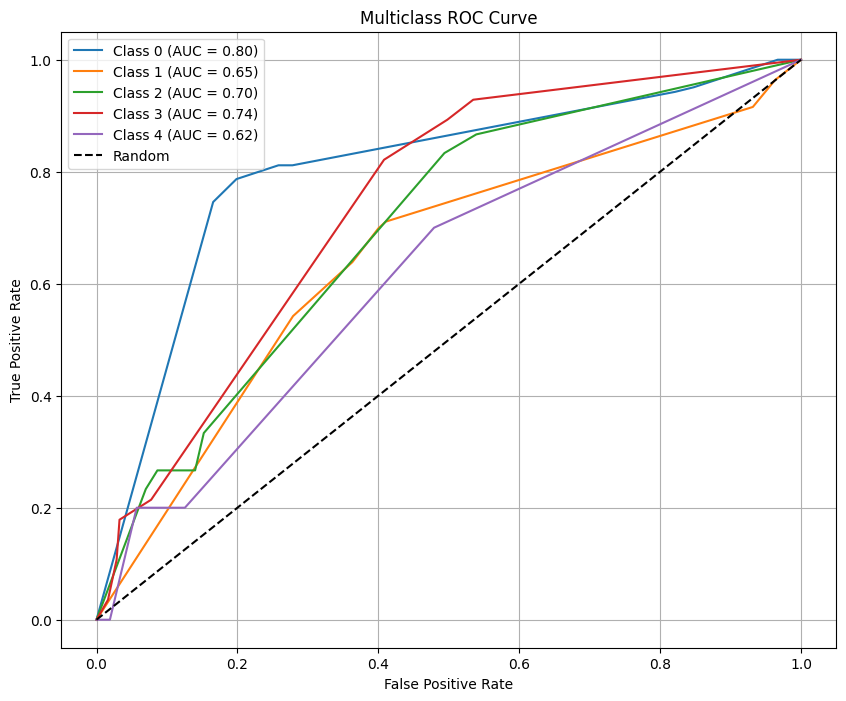

In [409]:
y_score = Final_Model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.grid()
plt.show()